# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

600

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#Declare variables

#API URL
url = "http://api.openweathermap.org/data/2.5/weather?appid="

#Lists to hold city data
dataCity = []
dataLat = []
dataLng = []
dataMaxTemp = []
dataHumidity = []
dataCloudiness = []
dataWindSpeed = []
dataCountry = []
dataDate = []
cityNumber = 0

#Run a loop

for wCity in cities:

    #Build the URL
    query_url = url + weather_api_key + "&units=imperial&q=" + wCity
    cityNumber+=1

    #Print the status
    print(f"Querying city number {cityNumber}, {wCity}...")

    #Get the API data
    weather_response = requests.get(query_url)
    cityData = weather_response.json()
    
    #Set up a try to avoid cities with missing data
    #Then pull data
    try:
        dataCity.append(cityData["name"])
        dataLat.append(cityData["coord"]["lat"])
        dataLng.append(cityData["coord"]["lon"])
        dataMaxTemp.append(cityData["main"]["temp_max"])
        dataHumidity.append(cityData["main"]["humidity"])
        dataCloudiness.append(cityData["clouds"]["all"])
        dataWindSpeed.append(cityData["wind"]["speed"])
        dataCountry.append(cityData["sys"]["country"])
        dataDate.append(cityData["dt"])
        
    #Print error text for exceptions
    except:
        print("Oops! Data not found. Skipping...")
    
    #Avoid tripping the API call limits
    time.sleep(1)

    #Print the done message
    print("Done.")


Querying city number 1, saint-philippe...
Done.
Querying city number 2, qaanaaq...
Done.
Querying city number 3, vanimo...
Done.
Querying city number 4, gamba...
Done.
Querying city number 5, puerto ayora...
Done.
Querying city number 6, tasiilaq...
Done.
Querying city number 7, faanui...
Done.
Querying city number 8, dhemaji...
Done.
Querying city number 9, atuona...
Done.
Querying city number 10, mataura...
Done.
Querying city number 11, bluff...
Done.
Querying city number 12, provideniya...
Done.
Querying city number 13, chokurdakh...
Done.
Querying city number 14, dunedin...
Done.
Querying city number 15, nelson bay...
Done.
Querying city number 16, nikolskoye...
Done.
Querying city number 17, hobyo...
Done.
Querying city number 18, spruce grove...
Done.
Querying city number 19, hermanus...
Done.
Querying city number 20, saskylakh...
Done.
Querying city number 21, asilah...
Done.
Querying city number 22, miranorte...
Oops! Data not found. Skipping...
Done.
Querying city number 23, 

Done.
Querying city number 180, dhidhdhoo...
Done.
Querying city number 181, stykkisholmur...
Done.
Querying city number 182, la ronge...
Done.
Querying city number 183, half moon bay...
Done.
Querying city number 184, westport...
Done.
Querying city number 185, sakakah...
Done.
Querying city number 186, inuvik...
Done.
Querying city number 187, umm kaddadah...
Done.
Querying city number 188, verkh-usugli...
Done.
Querying city number 189, comodoro rivadavia...
Done.
Querying city number 190, uruzgan...
Done.
Querying city number 191, aklavik...
Done.
Querying city number 192, tuatapere...
Done.
Querying city number 193, ponta do sol...
Done.
Querying city number 194, constitucion...
Done.
Querying city number 195, alofi...
Done.
Querying city number 196, mossendjo...
Done.
Querying city number 197, sisimiut...
Done.
Querying city number 198, aguimes...
Done.
Querying city number 199, mar del plata...
Done.
Querying city number 200, damaturu...
Done.
Querying city number 201, banda ace

Done.
Querying city number 352, aksha...
Done.
Querying city number 353, poso...
Done.
Querying city number 354, burg...
Done.
Querying city number 355, aykhal...
Done.
Querying city number 356, puerto carreno...
Done.
Querying city number 357, maceio...
Done.
Querying city number 358, sentyabrskiy...
Oops! Data not found. Skipping...
Done.
Querying city number 359, kapit...
Done.
Querying city number 360, port-cartier...
Done.
Querying city number 361, islamkot...
Done.
Querying city number 362, mabaruma...
Done.
Querying city number 363, westpunt...
Oops! Data not found. Skipping...
Done.
Querying city number 364, pemangkat...
Done.
Querying city number 365, pascagoula...
Done.
Querying city number 366, olga...
Done.
Querying city number 367, kingman...
Done.
Querying city number 368, alyangula...
Done.
Querying city number 369, kampene...
Done.
Querying city number 370, san cristobal...
Done.
Querying city number 371, saquena...
Done.
Querying city number 372, caravelas...
Done.
Que

Done.
Querying city number 531, kerema...
Done.
Querying city number 532, guanica...
Done.
Querying city number 533, tursunzoda...
Done.
Querying city number 534, taitung...
Done.
Querying city number 535, prince albert...
Done.
Querying city number 536, mrakovo...
Done.
Querying city number 537, dingle...
Done.
Querying city number 538, road town...
Done.
Querying city number 539, emerald...
Done.
Querying city number 540, vao...
Done.
Querying city number 541, saint-prosper...
Done.
Querying city number 542, newport...
Done.
Querying city number 543, chapleau...
Done.
Querying city number 544, maba...
Done.
Querying city number 545, jiuquan...
Done.
Querying city number 546, xiazhen...
Done.
Querying city number 547, shingu...
Done.
Querying city number 548, hasaki...
Done.
Querying city number 549, linguere...
Done.
Querying city number 550, ariquemes...
Done.
Querying city number 551, belaya gora...
Done.
Querying city number 552, paamiut...
Done.
Querying city number 553, haapu...

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
#Create the dataframe from the lists

cityWeather = pd.DataFrame({"City": dataCity,
                           "Lat": dataLat,
                           "Lng": dataLng,
                           "Max Temp": dataMaxTemp,
                           "Humidity": dataHumidity,
                           "Cloudiness": dataCloudiness,
                           "Wind Speed": dataWindSpeed,
                           "Country": dataCountry,
                           "Date": dataDate})

In [5]:
#export the datafram to CSV

cityWeather.to_csv("output_data/cities.csv")

In [3]:
#Load the data from the CSV to avoid re-doing the API calls every time the notebook is opened

city_data_df = pd.read_csv("output_data/cities.csv")

#Remove the extraneous index column
city_data_df = city_data_df.drop(columns = "Unnamed: 0")

city_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Saint-Philippe,-21.3585,55.7679,69.35,78,26,9.69,RE,1633665460
1,Qaanaaq,77.4840,-69.3632,22.30,66,100,6.15,GL,1633665462
2,Vanimo,-2.6741,141.3028,87.67,62,34,9.46,PG,1633665463
3,Gamba,-2.6500,10.0000,75.69,88,100,4.90,GA,1633665464
4,Puerto Ayora,-0.7393,-90.3518,68.56,95,93,8.01,EC,1633665466
...,...,...,...,...,...,...,...,...,...
550,Lobanovo,57.8595,56.3026,33.71,86,0,11.18,RU,1633666305
551,Barsovo,61.1667,73.1667,41.13,85,100,11.43,RU,1633666307
552,Dandong,40.1292,124.3947,65.14,70,69,4.07,CN,1633666308
553,Kwinana,-32.2500,115.7667,67.30,63,95,12.39,AU,1633666310


In [4]:
#Create summary data table to inspect the data

summaryData = city_data_df.describe(include=[np.number])

summaryData


,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,555.000000,555.000000,555.000000,555.000000,555.000000,555.000000,5.550000e+02
mean,19.830613,14.937754,62.129243,72.967568,57.969369,7.576126,1.633666e+09
std,33.803885,91.417389,18.271281,18.963646,38.980197,5.523705,2.606541e+02
min,-54.800000,-175.200000,10.270000,9.000000,0.000000,0.000000,1.633665e+09
25%,-8.832700,-66.623750,47.950000,63.000000,17.000000,3.330000,1.633666e+09
50%,22.758300,16.983300,65.980000,77.000000,71.000000,6.170000,1.633666e+09
75%,49.533500,99.139600,77.000000,87.500000,97.500000,10.740000,1.633666e+09
max,78.218600,179.316700,102.180000,100.000000,100.000000,28.570000,1.633666e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [5]:
#  Get the indices of cities that have humidity over 100%.

humidCities = city_data_df.index[city_data_df["Humidity"] > 100]

humidCities


Int64Index([], dtype='int64')

In [6]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

clean_city_data = city_data_df.drop(index = humidCities, inplace=False)

clean_city_data


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Saint-Philippe,-21.3585,55.7679,69.35,78,26,9.69,RE,1633665460
1,Qaanaaq,77.4840,-69.3632,22.30,66,100,6.15,GL,1633665462
2,Vanimo,-2.6741,141.3028,87.67,62,34,9.46,PG,1633665463
3,Gamba,-2.6500,10.0000,75.69,88,100,4.90,GA,1633665464
4,Puerto Ayora,-0.7393,-90.3518,68.56,95,93,8.01,EC,1633665466
...,...,...,...,...,...,...,...,...,...
550,Lobanovo,57.8595,56.3026,33.71,86,0,11.18,RU,1633666305
551,Barsovo,61.1667,73.1667,41.13,85,100,11.43,RU,1633666307
552,Dandong,40.1292,124.3947,65.14,70,69,4.07,CN,1633666308
553,Kwinana,-32.2500,115.7667,67.30,63,95,12.39,AU,1633666310


In [7]:
#Create summary data table to inspect the cleaned data

cleanSummaryData = clean_city_data.describe(include=[np.number])

cleanSummaryData


,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,555.000000,555.000000,555.000000,555.000000,555.000000,555.000000,5.550000e+02
mean,19.830613,14.937754,62.129243,72.967568,57.969369,7.576126,1.633666e+09
std,33.803885,91.417389,18.271281,18.963646,38.980197,5.523705,2.606541e+02
min,-54.800000,-175.200000,10.270000,9.000000,0.000000,0.000000,1.633665e+09
25%,-8.832700,-66.623750,47.950000,63.000000,17.000000,3.330000,1.633666e+09
50%,22.758300,16.983300,65.980000,77.000000,71.000000,6.170000,1.633666e+09
75%,49.533500,99.139600,77.000000,87.500000,97.500000,10.740000,1.633666e+09
max,78.218600,179.316700,102.180000,100.000000,100.000000,28.570000,1.633666e+09


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

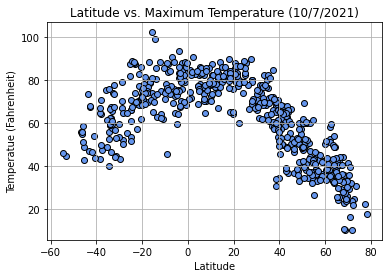

In [8]:
#Create the scatter plot
plt.scatter(clean_city_data["Lat"], clean_city_data["Max Temp"], marker="o", facecolors="cornflowerblue", edgecolors="black")

#Add labels and grid
plt.title("Latitude vs. Maximum Temperature (10/7/2021)")
plt.xlabel("Latitude")
plt.ylabel("Temperatue (Fahrenheit)")
plt.grid()

This scatter plot shows how each city's latitude relates to its maximum temperature (in degrees Fahreheit).

## Latitude vs. Humidity Plot

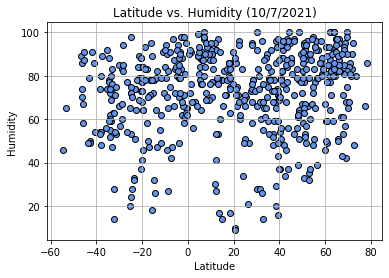

In [9]:
#Create the scatter plot
plt.scatter(clean_city_data["Lat"], clean_city_data["Humidity"], marker="o", facecolors="cornflowerblue", edgecolors="black")

#Add labels and grid
plt.title("Latitude vs. Humidity (10/7/2021)")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid()

This scatter plot shows how each city's latitude relates to its percent humidity.

## Latitude vs. Cloudiness Plot

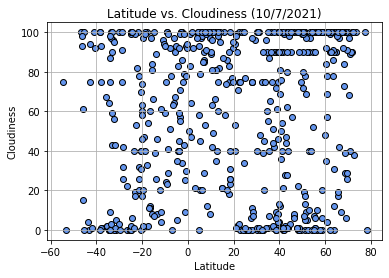

In [10]:
#Create the scatter plot
plt.scatter(clean_city_data["Lat"], clean_city_data["Cloudiness"], marker="o", facecolors="cornflowerblue", edgecolors="black")

#Add labels and grid
plt.title("Latitude vs. Cloudiness (10/7/2021)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid()

This scatter plot shows how each city's latitude relates to its cloudiness.

## Latitude vs. Wind Speed Plot

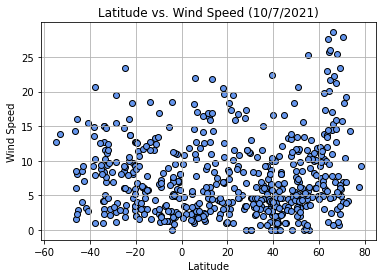

In [11]:
#Create the scatter plot
plt.scatter(clean_city_data["Lat"], clean_city_data["Wind Speed"], marker="o", facecolors="cornflowerblue", edgecolors="black")

#Add labels and grid
plt.title("Latitude vs. Wind Speed (10/7/2021)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid()

This scatter plot shows how each city's latitude relates to its wind speed.

## Linear Regression

In [12]:
#Define Northern and Southern hemisphere data

northernData = clean_city_data.loc[clean_city_data["Lat"] >= 0]

southernData = clean_city_data.loc[clean_city_data["Lat"] < 0]



####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7727897040856593


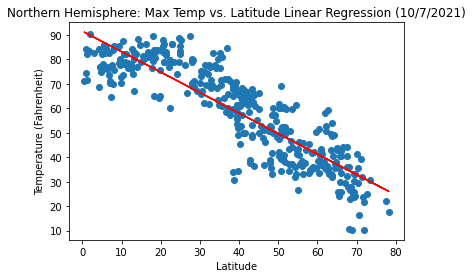

In [13]:
#Perform the regression
x_values = northernData['Lat']
y_values = northernData['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot the data and regression line
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,3),fontsize=15,color="red")
plt.title("Northern Hemisphere: Max Temp vs. Latitude Linear Regression (10/7/2021)")
plt.xlabel('Latitude')
plt.ylabel('Temperature (Fahrenheit)')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The regression appears to show a strong negative correlation between latitude and city temperature in the Northern Hemisphere -- cities further to the North are colder than those near the Equator. Presumably the greater intensity of sunlight toward the Equator tends to produce higher temperatures.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.4241953650163366


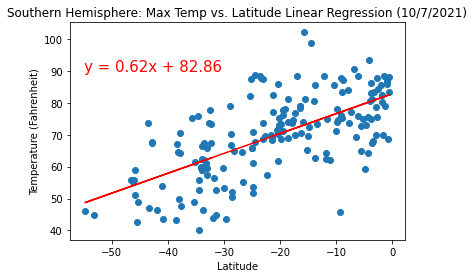

In [14]:
#Perform the regression
x_values = southernData['Lat']
y_values = southernData['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot the data and regression line
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,90),fontsize=15,color="red")
plt.title("Southern Hemisphere: Max Temp vs. Latitude Linear Regression (10/7/2021)")
plt.xlabel('Latitude')
plt.ylabel('Temperature (Fahrenheit)')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The regression appears to show a moderate positive correlation between latitude and city temperature in the Southern Hemisphere -- cities further to the South are colder than those near the Equator. Presumably the greater intensity of sunlight toward the Equator tends to produce higher temperatures.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.0029076983924244014


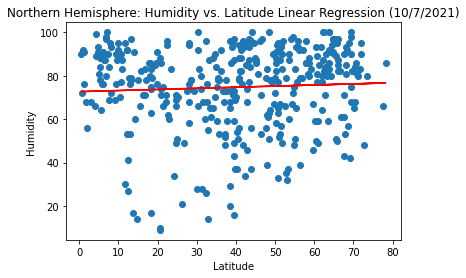

In [15]:
#Perform the regression
x_values = northernData['Lat']
y_values = northernData['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot the data and regression line
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,3),fontsize=15,color="red")
plt.title("Northern Hemisphere: Humidity vs. Latitude Linear Regression (10/7/2021)")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The regression appears to show virtually no correlation between latitude and Humidity in the Northern Hemisphere.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.024805505845497143


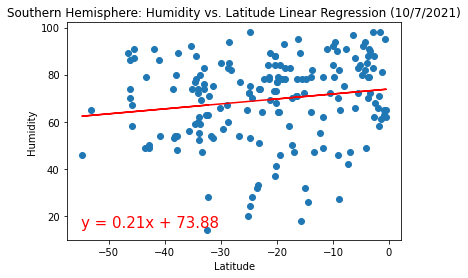

In [16]:
#Perform the regression
x_values = southernData['Lat']
y_values = southernData['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot the data and regression line
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,15),fontsize=15,color="red")
plt.title("Southern Hemisphere: Humidity vs. Latitude Linear Regression (10/7/2021)")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The regression appears to show virtually no correlation between latitude and Humidity in the Southern Hemisphere.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.00025856237802274483


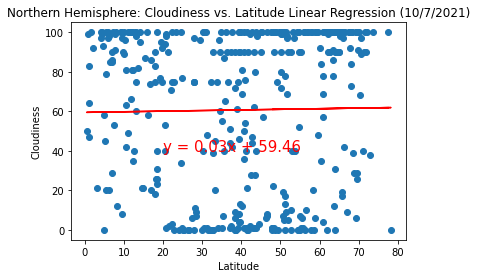

In [17]:
#Perform the regression
x_values = northernData['Lat']
y_values = northernData['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot the data and regression line
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,40),fontsize=15,color="red")
plt.title("Northern Hemisphere: Cloudiness vs. Latitude Linear Regression (10/7/2021)")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The regression appears to show virtually no correlation between latitude and cloudiness in the Northern Hemisphere. However, certain cloudiness values (100, 0, ~90) appear to show up more frequently than one would expect by chance. Because they appear to be round numbers, I would propose measurement error as a possible explanation -- floor and ceiling effects in particular.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.01657287377739107


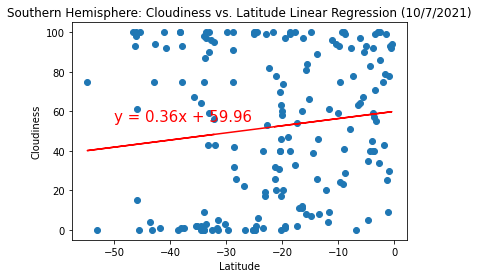

In [18]:
#Perform the regression
x_values = southernData['Lat']
y_values = southernData['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot the data and regression line
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,55),fontsize=15,color="red")
plt.title("Southern Hemisphere: Cloudiness vs. Latitude Linear Regression (10/7/2021)")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The regression appears to show virtually no correlation between latitude and cloudiness in the Southern Hemisphere. However, as with the Northern Hemisphere, certain cloudiness values (100, 0) appear to show up more frequently than one would expect by chance, though the effect is less clear (perhaps due to the lower number of cities in the data set). Because they appear to be round numbers, I would propose measurement error as a possible explanation -- floor and ceiling effects in particular.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.028316167450639876


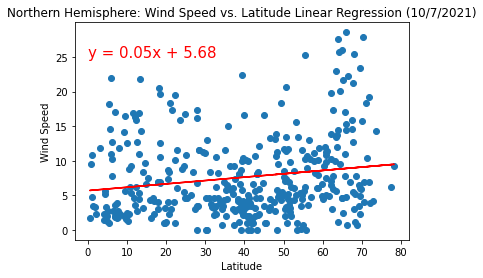

In [19]:
#Perform the regression
x_values = northernData['Lat']
y_values = northernData['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot the data and regression line
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,25),fontsize=15,color="red")
plt.title("Northern Hemisphere: Wind Speed vs. Latitude Linear Regression (10/7/2021)")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The regression appears to show virtually no correlation between latitude and wind speed in the Northern Hemisphere.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.045464629854208245


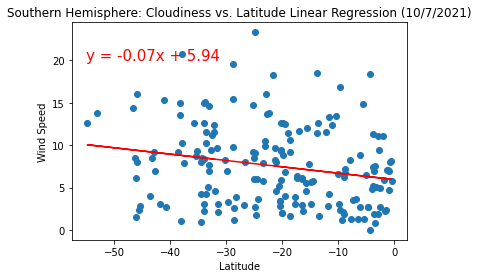

In [20]:
#Perform the regression
x_values = southernData['Lat']
y_values = southernData['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot the data and regression line
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,20),fontsize=15,color="red")
plt.title("Southern Hemisphere: Cloudiness vs. Latitude Linear Regression (10/7/2021)")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The regression appears to show virtually no correlation between latitude and wind speed in the Southern Hemisphere.